In [1]:
#Automatically label
import pandas as pd

# Define the path for the video
video_path = 'tracking_data/Tracking_Video04.csv'

# Load the CSV file
df = pd.read_csv(video_path)

# Calculate the difference between the current and previous row for 'Left hip_y'
df['Left hip_y_diff'] = df['Left hip_y'].diff()

# Calculate the new pause threshold
new_pause_threshold = df['Left hip_y_diff'].abs().quantile(0.25)

# Define a function to apply robust labeling
def apply_robust_labeling(changes, pause_threshold, min_consecutive=3):
    robust_labels = []
    current_label = "Unknown"
    consecutive_count = 0

    for change in changes:
        if pd.isna(change):
            # First data point
            new_label = "Unknown"
        elif abs(change) <= pause_threshold:
            new_label = "Pause"
        elif change > 0:
            new_label = "Descending"
        else:
            new_label = "Ascending"

        # Check if the new label is the same as the current label
        if new_label == current_label:
            consecutive_count += 1
        else:
            consecutive_count = 1
            current_label = new_label

        # Update label if there are enough consecutive labels
        if consecutive_count >= min_consecutive:
            robust_labels.append(current_label)
        else:
            robust_labels.append("Transition")

    return robust_labels

# Apply robust labeling to the dataset
df['Label'] = apply_robust_labeling(df['Left hip_y_diff'], new_pause_threshold)

# Drop the 'Left hip_y_diff' column as it's no longer needed
df = df.drop('Left hip_y_diff', axis=1)

# Save the dataframe to a new CSV file
csv_file_name = video_path.split('/')[-1].split('.')[0] + '_labled.csv'
df.to_csv('tracking_data/' + csv_file_name, index=False)


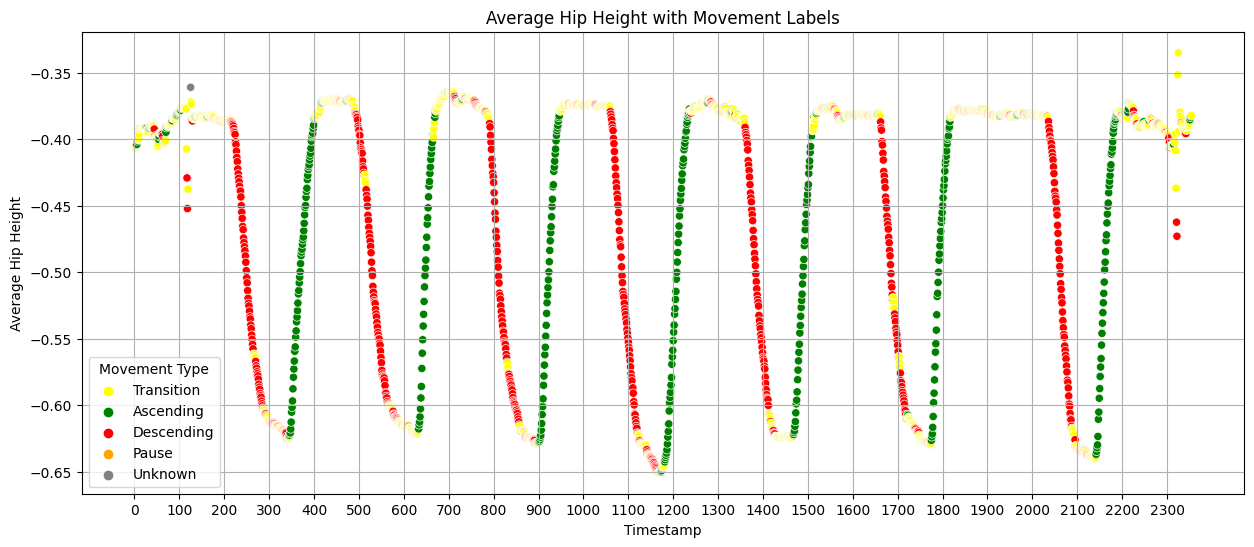

In [3]:
#Plot with lables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Usage
csv_file_path = 'tracking_data/Tracking_Video04_labled.csv'  # Replace with your CSV file path
ignore_start = 0# Number of frames to ignore at the start
ignore_end = 0  # Number of frames to ignore at the end

def plot_movement_data(csv_file_path, ignore_start=0, ignore_end=0):
    # Read the data from the CSV file
    data = pd.read_csv(csv_file_path, delimiter=',')

    # Ignore specified amount of frames at the beginning and/or end
    data = data[ignore_start:-ignore_end or None]

    # Calculate the average hip height
    data['Average_Hip_Height'] = (data['Left hip_y'] + data['Right hip_y']) / 2

    # Define custom color mapping for movement types
    custom_color_mapping = {'Pause': 'orange', 'Ascending': 'green', 'Descending': 'red', 'Transition': 'yellow', 'Unknown': 'grey'}

    # Plotting the data
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=data['Timestamp'], y=-data['Average_Hip_Height'], 
                    hue=data['Label'], palette=custom_color_mapping)

    plt.title('Average Hip Height with Movement Labels')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Hip Height')
    plt.legend(title='Movement Type')

    # Increase the number of x-axis ticks for better granularity
    plt.xticks(np.arange(min(data['Timestamp']), max(data['Timestamp'])+1, 100.0))

    # Add grid for better visualization
    plt.grid(True)

    plt.show()

plot_movement_data(csv_file_path, ignore_start, ignore_end)


In [66]:
#remove unneeded Frames
def remove_ignored_frames(csv_file_path, ignore_start=0, ignore_end=0):
    # Read the data from the CSV file
    data = pd.read_csv(csv_file_path, delimiter=',')

    # Ignore specified amount of frames at the beginning and/or end
    data = data[ignore_start:-ignore_end or None]

    # Save the modified data back to the CSV file
    data.to_csv(csv_file_path, index=False)

# Usage
csv_file_path = 'tracking_data/Tracking_Video03.csv'  # Replace with your CSV file path
ignore_start = 1400  # Number of frames to ignore at the start
ignore_end = 100  # Number of frames to ignore at the end
remove_ignored_frames(csv_file_path, ignore_start, ignore_end)